In [2]:
import numpy as np
from matplotlib import rc
from matplotlib import pyplot as plt

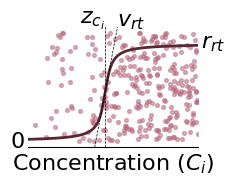

In [48]:
def threshold_arctan(C_i, z_ci, r_rt, v_rt):
    return r_rt * (0.5 + (1 / np.pi) * np.arctan(v_rt * (C_i - z_ci)))

slope = lambda v_rt, C_i, r_rt, z_ci: 0.25*(C_i - z_ci) * v_rt+r_rt/2

n = 5000
ivl = 5
C_i = np.linspace(0, 11, n)
z_ci = 5
r_rt = 0.9
v_rt = 3
c = int(n/2)

thresh_arctan = threshold_arctan(C_i, z_ci, r_rt, v_rt)


dots = np.random.uniform(0, 1, 300)
dotspos = np.random.beta(2, 1, 300) * 11

cm = 1/2.56  # convert cm to inch

rc("font", family='monospace', size=16)
rc("font", family='sans-serif', size=16)

fig, ax = plt.subplots(1, 1, figsize=(6*cm,4.5*cm))
ax.scatter(dotspos, dots, marker="o", s=7.5, color="#B56478", alpha=.5)
ax.vlines(z_ci, -0.05, 1.1, lw=.5, ls="--", color="black")
ax.plot(C_i, thresh_arctan, lw=2, ls="-", color="#5A2731", label="threshold arctan")
ax.plot(C_i, slope(v_rt, C_i, r_rt, z_ci), ls="dashed", lw=.5, color="black")
ax.set_yticks([])
ax.set_xticks([])
ax.set_xticklabels([])
# ax.set_ylabel("NRF2 expression rate")
ax.set_xlim(0, 11)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel(r"Concentration ($C_i$)")
ax.text(z_ci + .8, 1.01, r"$v_{rt}$", va="bottom", ha="left")
ax.text(11.2, r_rt, r"$r_{rt}$", va="center", ha="left")
ax.text(-0.2, 0, r"$0$", va="center", ha="right")
ax.text(z_ci, 1.01, r"$z_{c_i}$", va="bottom", ha="right")

ax.spines[["top", "left", "right"]].set_visible(False)
fig.subplots_adjust(bottom=0.2, right=0.85)
fig.savefig("../results/activation.png", transparent=True, dpi=600)
fig.savefig("../results/activation.svg", transparent=True, dpi=600)
